In [1]:
import keras
from keras.datasets import cifar10

# load the dataset
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


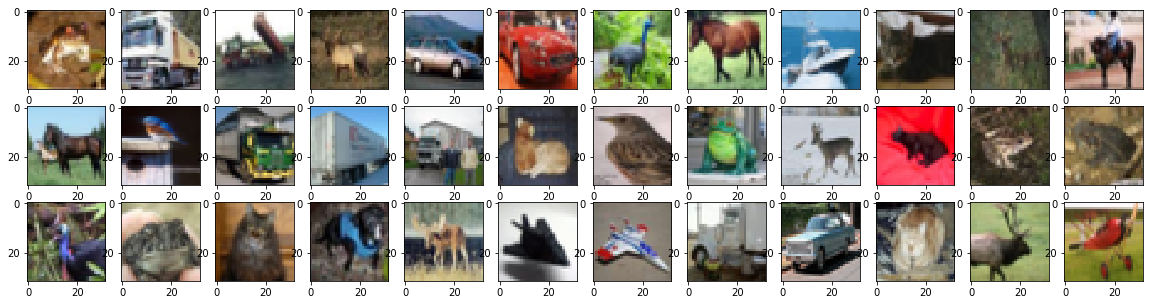

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# visualize data
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1)
    ax.imshow(np.squeeze(X_train[i]))

In [3]:
# rescale [0, 255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('X_train shape: ', X_train.shape)

X_train shape:  (45000, 32, 32, 3)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 3,590,642.0
Trainable params: 3,590,642.0
Non-trainable params: 0.0
____________________________________________________________

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [9]:
from keras.callbacks import ModelCheckpoint
checkpoiter = ModelCheckpoint(filepath='mlp.weights.best.hdf5', verbose=1, save_best_only=True)

In [10]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid,y_valid), 
          callbacks=[checkpoiter], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 1.80290, saving model to mlp.weights.best.hdf5
72s - loss: 2.4009 - acc: 0.2655 - val_loss: 1.8029 - val_acc: 0.3444
Epoch 2/20
Epoch 00001: val_loss did not improve
84s - loss: 1.8459 - acc: 0.3336 - val_loss: 1.8589 - val_acc: 0.3252
Epoch 3/20
Epoch 00002: val_loss improved from 1.80290 to 1.77085, saving model to mlp.weights.best.hdf5
93s - loss: 1.7999 - acc: 0.3572 - val_loss: 1.7708 - val_acc: 0.3626
Epoch 4/20
Epoch 00003: val_loss improved from 1.77085 to 1.69421, saving model to mlp.weights.best.hdf5
93s - loss: 1.7828 - acc: 0.3603 - val_loss: 1.6942 - val_acc: 0.3858
Epoch 5/20
Epoch 00004: val_loss did not improve
94s - loss: 1.7706 - acc: 0.3661 - val_loss: 1.7021 - val_acc: 0.3804
Epoch 6/20
Epoch 00005: val_loss did not improve
98s - loss: 1.7561 - acc: 0.3737 - val_loss: 1.7633 - val_acc: 0.3678
Epoch 7/20
Epoch 00006: val_loss did not improve
99s - loss: 1.7646 - acc